In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
from h5py import *
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

In [2]:
# 2d plot of the permeability field
def plot(cells, case="trigonometric"):
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))
    fig.suptitle(f"Permeability field [{case}]")
    axes = axes.ravel()
    axes[0].imshow(cells[:,:,0])
    axes[2].imshow(cells[:,0,:])
    axes[3].imshow(cells[0,:,:])
    axes[0].set_title("yz")
    axes[2].set_title("xz")
    axes[3].set_title("xy")
    for i in range(0,4):
        axes[i].axis("off")
    fig.tight_layout()
    # plt.colorbar()
    fig.show()


In [3]:
def make_perm_grid(max, min, factor, ncells, size, case="trigonometric"):
    length_cells = size / ncells
    icells = [np.linspace(1, ncells[i], ncells[i]) for i in (0,1,2)]
    idx, idy, idz = np.meshgrid(icells[0], icells[1], icells[2], indexing="ij")
    if case=="trigonometric":
        # function exemplary
        def fct_sin(value):
            return (max - min)/2 * np.sin(value/factor) + (max + min)/2
        def fct_cos(value):
            return (max - min)/2 * np.cos(value/factor) + (max + min)/2
        values = (fct_cos(idx*length_cells[1])+fct_cos(idy*length_cells[0])+fct_cos(idz*length_cells[2]))/3  # ORDER X,Y,Z
    elif case=="rand_interpolate":
        # Interpolation with RegularGridInterpolator from scipy (can do 3D, works on a regular grid)
        nbases = 5
        length_cells_base = size / nbases
        icells_base = [np.linspace(1, ncells[i], nbases) for i in (0,1,2)]
        idx_base, idy_base, idz_base = np.meshgrid(icells_base[0], icells_base[1], icells_base[2], indexing="ij") # ORDER X,Y,Z

        def fct_rand(shape=[nbases,nbases,nbases]):
            return np.random.uniform(min, max, size=shape)
        values_base = fct_rand()

        test_points = np.array([idx.ravel(), idy.ravel(), idz.ravel()]).T
        interpolator = RegularGridInterpolator(icells_base, values_base)
        method = "linear" # in ['linear', 'nearest', 'slinear', 'cubic', 'quintic']:
        values = interpolator(test_points, method=method).reshape(ncells[0], ncells[1], ncells[2]).T
    
    return values, icells

def save_perm(filename, ncells, cells):
    n = ncells[0] * ncells[1] * ncells[2]
    cells_array_flatten = cells.reshape(n, order='F')

    h5file = File(filename,mode='w')

    # create integer array for cell ids
    iarray = np.arange(n,dtype='u8')
    # convert to 1-based
    iarray[:] += 1
    dataset_name = 'Cell Ids'
    h5dset = h5file.create_dataset(dataset_name, data=iarray)

    # create double array for porosities
    # rarray = np.zeros(n,dtype='f8')
    # rarray[:] = 0.25
    # rarray[4:7] = 0.3
    dataset_name = 'Permeability'
    h5dset = h5file.create_dataset(dataset_name, data=cells_array_flatten)

    h5file.close()

/tmp/ipykernel_41882/3445004395.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


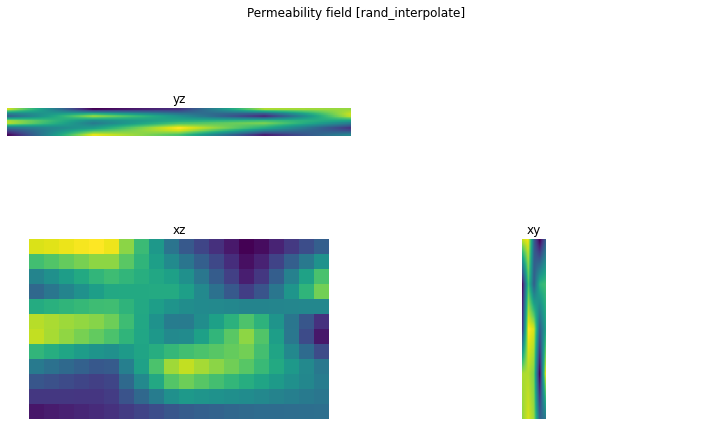

In [4]:
# size = np.array([500, 1000, 30])
size = np.array([100, 500, 30])
# ncells = np.array([75, 150, 12])
ncells = np.array([20, 150, 12])
perm_max = 6.65*10**-9
perm_min = 1.36*10**-12
factor = 40
case="rand_interpolate"
cells, icells = make_perm_grid(perm_max, perm_min, factor, ncells, size, case=case)
plot(cells, case=case)

In [6]:
filename = 'permeability.h5'
# TODO dimensionen? Reihenfolge?
save_perm(filename, ncells, cells)

In [192]:
# # read hdf5 file
# h5file_compare = File("543_initial_pressure.h5",mode='r')
# # print header in h5 file
# print(h5file_compare.keys())
# print(h5file_compare['Cell Ids'])
# print(h5file_compare['Cell Ids'][:])
# print(h5file_compare['Pressure'])
# print(h5file_compare['Pressure'][:])

In [193]:
# # read h5 perm file
# h5file = File("permeability.h5",mode='r')

# # print header in h5 file
# print(h5file.keys())
# print(h5file['Cell Ids'])
# print(h5file['Cell Ids'][:])
# print(h5file['Permeability'])
# print(h5file['Permeability'][:])

# h5file.close()